# Experiments for Time series generation



## ARMA models

In [1]:
# allow import from parent directory
import sys,os
sys.path.append(os.getcwd() + '/..')

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
# import helper functions for dataset generation
# from ts_gen import make_binary_code_dataset,make_flat_dataset,make_slopes_dataset
# import helper functions for dataset visualization
from ts_viz import plot_list_of_ts,plot_list_of_ts_over_subplots
# import helper functions to adjust list of series according to output of the clustering
# from ts_utils import get_clustered_list

In [4]:
from dataclasses import dataclass,field
from typing import List



### [Autoregressive model](https://en.wikipedia.org/wiki/Autoregressive_model)

the notation AR(p) refers to the autoregressive model of order p. The AR(p) model is written

![AR equation](img/ar.svg)

where $\varphi _{1},\ldots ,\varphi _{p}$ are parameters, c is a constant, and the random variable $\varepsilon _{t}$ is white noise.

Some constraints are necessary on the values of the parameters so that the model remains stationary. For example, processes in the AR(1) model with ${\displaystyle |\varphi _{1}|\geq 1}$ are not stationary.

In [5]:
@dataclass
class AR:
    coeff : List[float]
    c     : float = 0.0
    sigma : float = 1.0
    x_buff: List[float] = field(default_factory=list)

    def generate(self, n = 100):
        x = []
        for _ in range(n):
            x.append(self._next_x())
        return x

    def _next_x(self):
        next_e = random.gauss(0,self.sigma)
        next_x = self.c + sum([p*xt for p,xt in zip(self.coeff,self.x_buff[::-1])]) + next_e
        self.x_buff.append(next_x)
        self.x_buff = self.x_buff[-len(self.coeff):]
        return next_x  

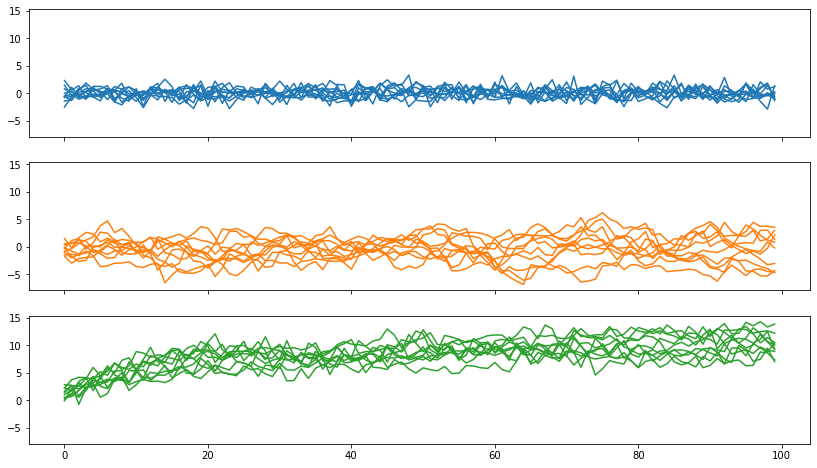

In [57]:
param_list = [{'c' : 0, 'coeff' : []},
              {'c' : 0, 'coeff' : [1,-0.2,0.1]},
              {'c' : 1, 'coeff' : [0.5,-0.1,0.5]},]

samples_per_model = 10

list_of_series = []
for i,params in enumerate(param_list):
    for _ in range(samples_per_model):
        ar = AR(**params)
        list_of_series.append(pd.Series(ar.generate(),name=i))

plot_list_of_ts_over_subplots(list_of_series,figsize=(14,8));



### [Moving-Average model](https://en.wikipedia.org/wiki/Moving-average_model)

The notation MA(q) refers to the moving average model of order q:

![MA equation](img/ma.svg)

where μ is the mean of the series, the θ1, ..., θq are the parameters of the model and the εt, εt−1,..., εt−q are white noise error terms. The value of q is called the order of the MA model

In [36]:
@dataclass
class MA:
    coeff : List[float] = field(default_factory=list)
    mu    : float = 0.0
    sigma : float = 1.0
    e_buff: List[float] = field(default_factory=list)

    def generate(self, n = 100):
        x = []
        for _ in range(n):
            x.append(self._next_x())
        return x

    def _next_x(self):
        next_e = random.gauss(0,self.sigma)
        next_x = self.mu + next_e + sum([p*et for p,et in zip(self.coeff,self.e_buff[::-1])])
        self.e_buff.append(next_e)
        self.e_buff = self.e_buff[-len(self.coeff):]
        return next_x
        

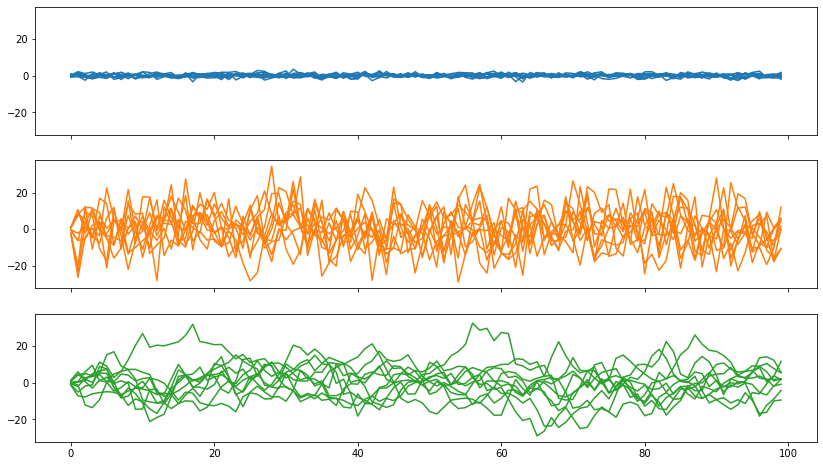

In [61]:
param_list = [{'mu' : 0, 'coeff' : []},
              {'mu' : 0, 'coeff' : [10]},
              {'mu' : 0, 'coeff' : [5,4,3,3,3,3,2,1]}]

samples_per_model = 10

list_of_series = []
for i,params in enumerate(param_list):
    for _ in range(samples_per_model):
        ma = MA(**params)
        list_of_series.append(pd.Series(ma.generate(),name=i))

plot_list_of_ts_over_subplots(list_of_series,figsize=(14,8));

### Credits

notebook by Marcello Morchio 2020

repository https://github.com/mallibus/pynuTS

In [286]:
random.gauss(0,0)

0.0